In [ ]:
# This iImporting libraries and loading the Dataframes formatted as code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder



In [ ]:
import random
# Change the path of the database
path = r"/content/drive/MyDrive/Diamond/REPO/Database/Diamonds_values_faltantes.csv"
diamonds = pd.read_csv(fr"{path}")

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,NaN,61.2,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,NaN,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,NaN,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
#Visualization of linear correlation coefficient and data separation for better implementation of KNN.
#Number of missing values per column

counter = {}
for x in range(diamonds.shape[1]):
    column_name = diamonds.columns[x]
    counter[column_name] = diamonds.shape[0] - len(diamonds[column_name].dropna())

counter_df = pd.DataFrame(list(counter.items()), columns=['Coluna', 'Quantidade de NaN'])
counter_df

,Coluna,Quantidade de NaN
0,carat,1649
1,cut,1556
2,color,1540
3,clarity,1476
4,depth,1421
5,table,1369
6,price,1340
7,x,1308
8,y,1253
9,z,1257


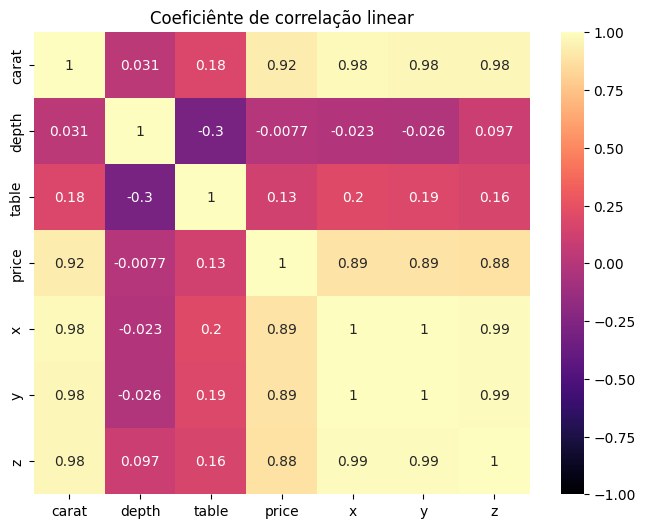

In [ ]:
#Heatmap visualization of linear correlation coefficient

plt.figure(figsize = (8, 6))
sns.heatmap((diamonds[["carat", "depth", "table", "price", "x", "y", "z"]]).corr(), vmin = -1, vmax = 1, annot = True, cmap = 'magma')
plt.title("Coeficiênte de correlação linear")
plt.show()

Analysis of the heatmap based on price:
We can conclude that the price doesn't have a good correlation with the total percentage of the diamond (depth) and also doesn't have a high correlation with the table, being an inversely proportional correlation of -0.0086 with the depth, and a proportional relationship of 0.13 with the table.
We can also conclude that the price has a good linear correlation with carat (carat) of 0.92, x (length) of 0.89, y (width) of 0.89 and z (depth) of 0.88.
Based on this heatmap analysis, we can conclude that the larger the carat (carat), x (length), y (width) and z (depth), the higher the price of the diamond may be.
However, there may be some cases where a diamond has a very high carat but a low price, just as there may be diamonds with a low carat but a high price. This can also happen with x (length), y (width) and z (depth). To address this, we need to analyze the Coefficient of Determination.

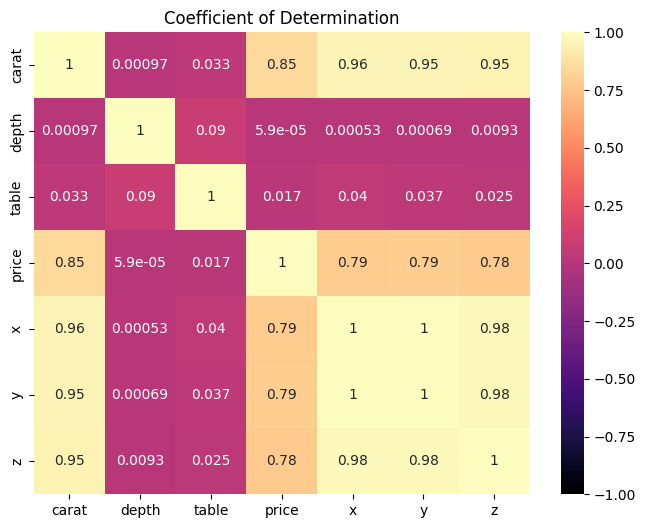

In [ ]:
#Heatmap visualization of Coefficient of Determination

plt.figure(figsize = (8, 6))
sns.heatmap((diamonds[["carat", "depth", "table", "price", "x", "y", "z"]]).corr()**2, vmin = -1, vmax = 1, annot = True, cmap = 'magma')
plt.title("Coefficient of Determination")
plt.show()

Analysis of the heatmap based on price:
Analyzing the heatmap above, we can see that we can define the price of the diamond with greater reliability using the numerical variable carat (carat), with a reliability of 85%. This means that even though we can say that the larger the carat of the diamond, the higher its price, unfortunately this rule is only actually valid for 85% of the data.
For x (length), y (width) and z (depth), this reliability is only 79% for length and width, and 78% for depth, which is not a strong determination. Therefore, these features can be disregarded if categorical variables can define the price of the diamond with precision.
We will now perform the process of separating the diamonds database to make the machine learning process more effective.
Cut: 5 classifications: Ideal, Premium, Good, Very Good and Fair
Color: 7 classifications: E, I, J, H, F, G and D
Clarity: 8 classifications: SI2, SI1, VS1, VS2, VVS2, VVS1, I1 and IF

In [6]:
#Implementing K-NN
#Setting measurements equal to 0 length, width and/or depth of a diamond as NaN

for x in range(diamonds.shape[0]):
    for y in range(7, diamonds.shape[1]):
        if diamonds.iloc[x, y] == 0: diamonds.iloc[x, y] = np.nan
        elif diamonds.iloc[x, y] >= 30: diamonds.iloc[x, y] = np.nan
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,NaN,61.2,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,NaN,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,NaN,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [7]:
# Implementing K-NN on numerical columns

'''Some books advise using the formula (K = log n) where n is the number of rows in the database.
To thus define the amount of K.'''

classificacao = KNNImputer(n_neighbors = round(math.log(diamonds.shape[0])))
diamonds[["carat", "depth", "table", "price", "x", "y", "z"]] = classificacao.fit_transform(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]])

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.950000,3.98,2.43
1,0.21,Premium,E,NaN,61.2,61.0,326.0,3.890000,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.050000,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.362727,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.340000,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.750000,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.690000,5.75,3.61
53937,0.70,NaN,D,SI1,62.8,60.0,2757.0,5.660000,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.150000,6.12,3.74


In [ ]:
# Applying K-NN for categorical columns
encoder = OrdinalEncoder()
diamonds_encoder = encoder.fit_transform(diamonds)

knn_imputer = KNNImputer(n_neighbors = round(math.log(diamonds.shape[0])))
diamonds_imputer = knn_imputer.fit_transform(diamonds_encoder)


diamonds_imputer = pd.DataFrame(diamonds_imputer, columns = diamonds.columns)
diamonds_imputer = encoder.inverse_transform(diamonds_imputer)

# Substituindo os valores faltantes na base de dados diamonds principal
for x in range(diamonds.shape[0]):
    for y in range(1, 4):
        if pd.isna(diamonds.iloc[x, y]): diamonds.iloc[x, y] = diamonds_imputer[x][y]

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.950000,3.98,2.43
1,0.21,Premium,E,VS1,61.2,61.0,326.0,3.890000,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.050000,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.362727,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.340000,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.750000,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.690000,5.75,3.61
53937,0.70,Premium,D,SI1,62.8,60.0,2757.0,5.660000,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.150000,6.12,3.74


In [9]:
# Normalizing numerical columns

##standardization of numerical columns
diamonds[["carat", "x", "y", "z"]] = round(diamonds[["carat", "x", "y", "z"]], 2)
diamonds[["table", "price"]] = round(diamonds[["table", "price"]])
diamonds["depth"] = round(diamonds["depth"], 1)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,VS1,61.2,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.36,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Premium,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
# Saving the cleaned database without missing values

path = r"DataBases\Diamonds_limpa.csv"
try:
    pd.read_csv(f"{path}")
    print(f"This dataframe already exists in the directory: {path}")
except FileNotFoundError:
    diamonds.to_csv(fr"{path}", index = False)
    print(f'''Cleaned database added to directory:
          {path}
          successfully!!''')

This dataframe already exists in the directory: DataBases\Diamonds_limpa.csv


# Analysis of the price relationship of the numerical columns

IMPORTANT INFORMATION:

1 Carat is equivalent to 200mg

1 Point is equivalent to 0.01 carats



# Comparing the relationship of diamond length with carat and price






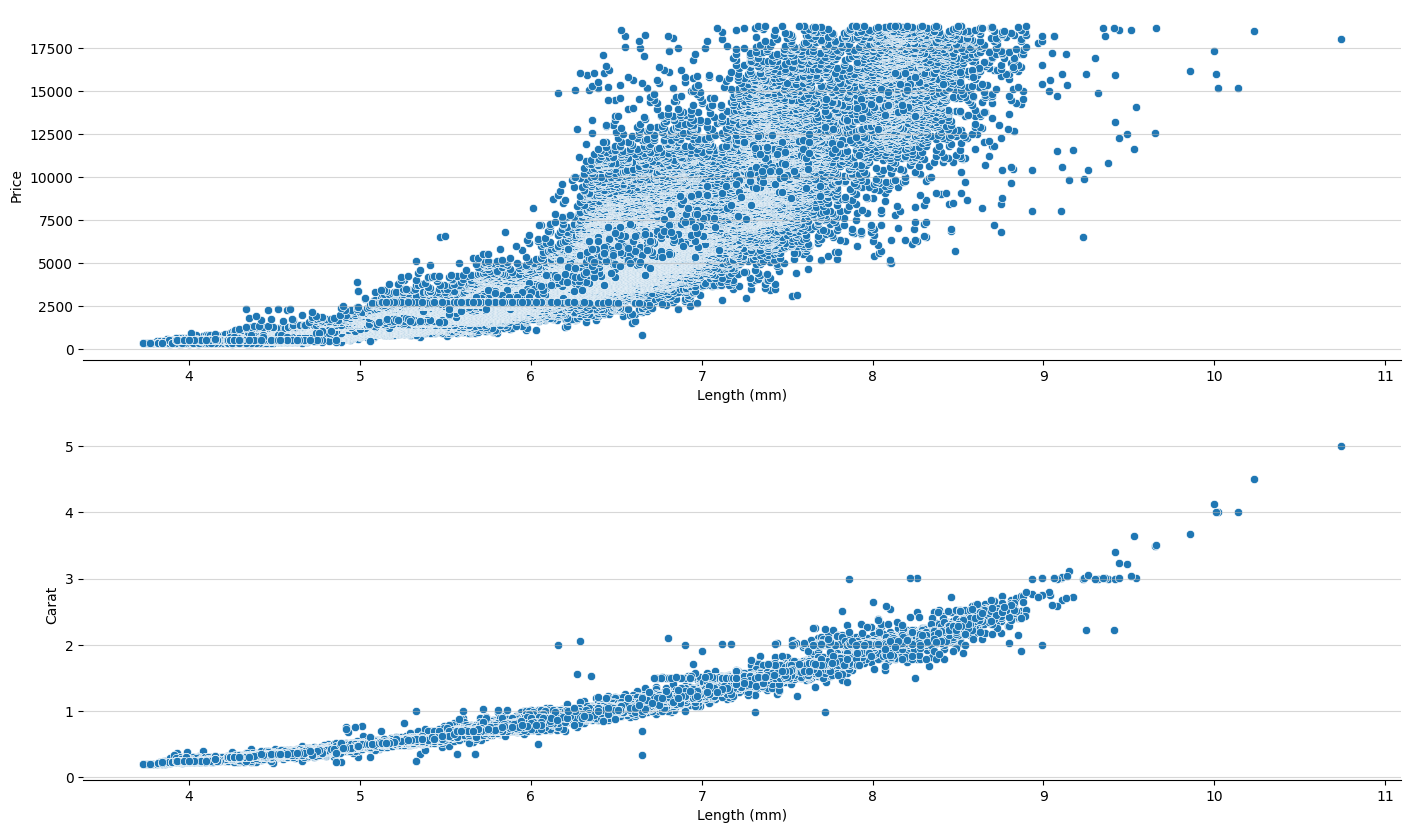

In [11]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(data=diamonds, x =  "x", y = "price")
plt.xlabel("Length (mm)")
plt.ylabel("Price")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.subplot(2, 1, 2)
sns.scatterplot(data=diamonds, x = "x", y = "carat")
plt.xlabel("Length (mm)")
plt.ylabel("Carat")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.show()

# Comparing the relationship of diamond width with carat and price


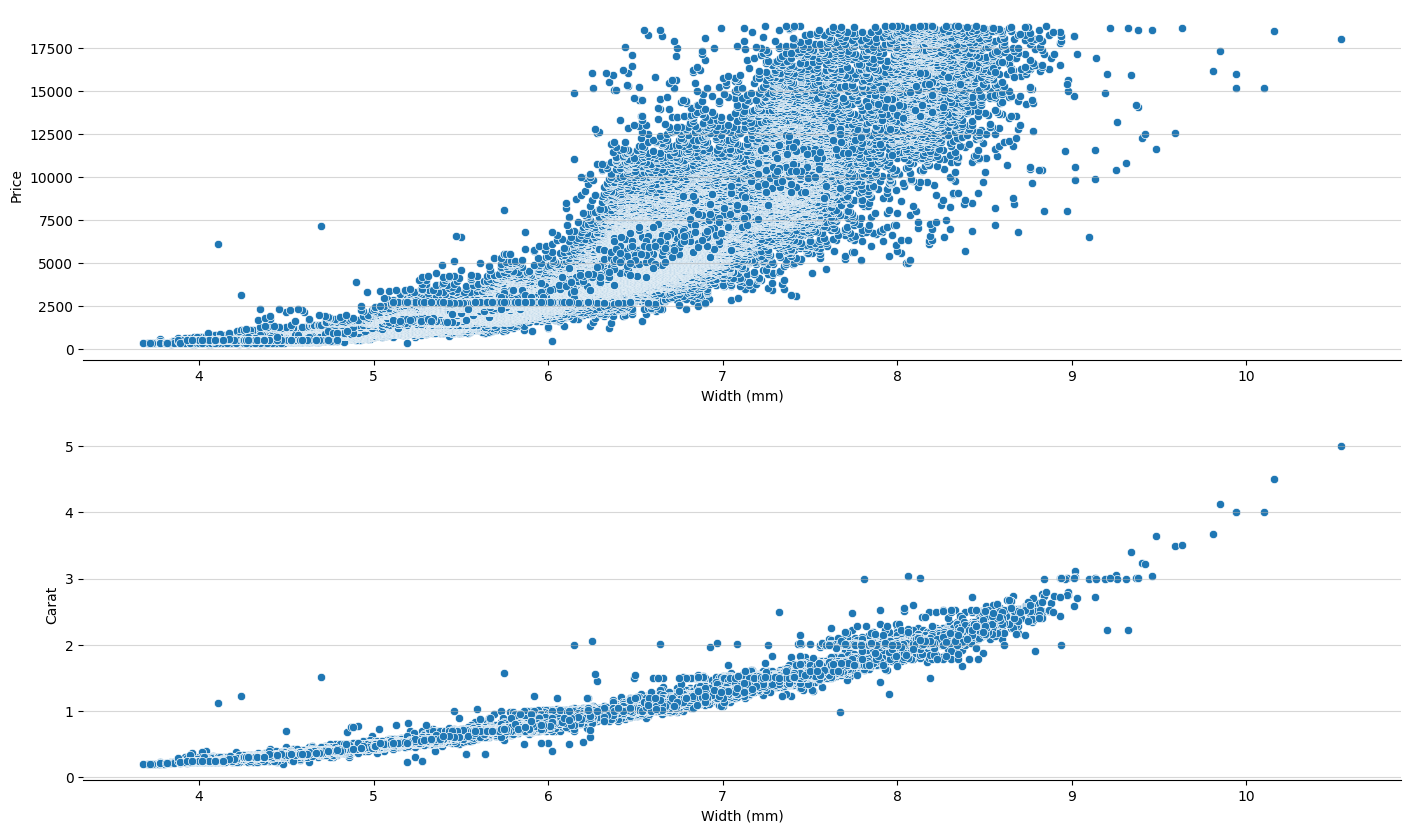

In [12]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(diamonds, x = "y", y = "price")
plt.xlabel("Width (mm)")
plt.ylabel("Price")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.subplot(2, 1, 2)
sns.scatterplot(diamonds, x = "y", y = "carat")

plt.xlabel("Width (mm)")
plt.ylabel("Carat")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.show()

# Comparing the relationship of diamond depth with carat and price


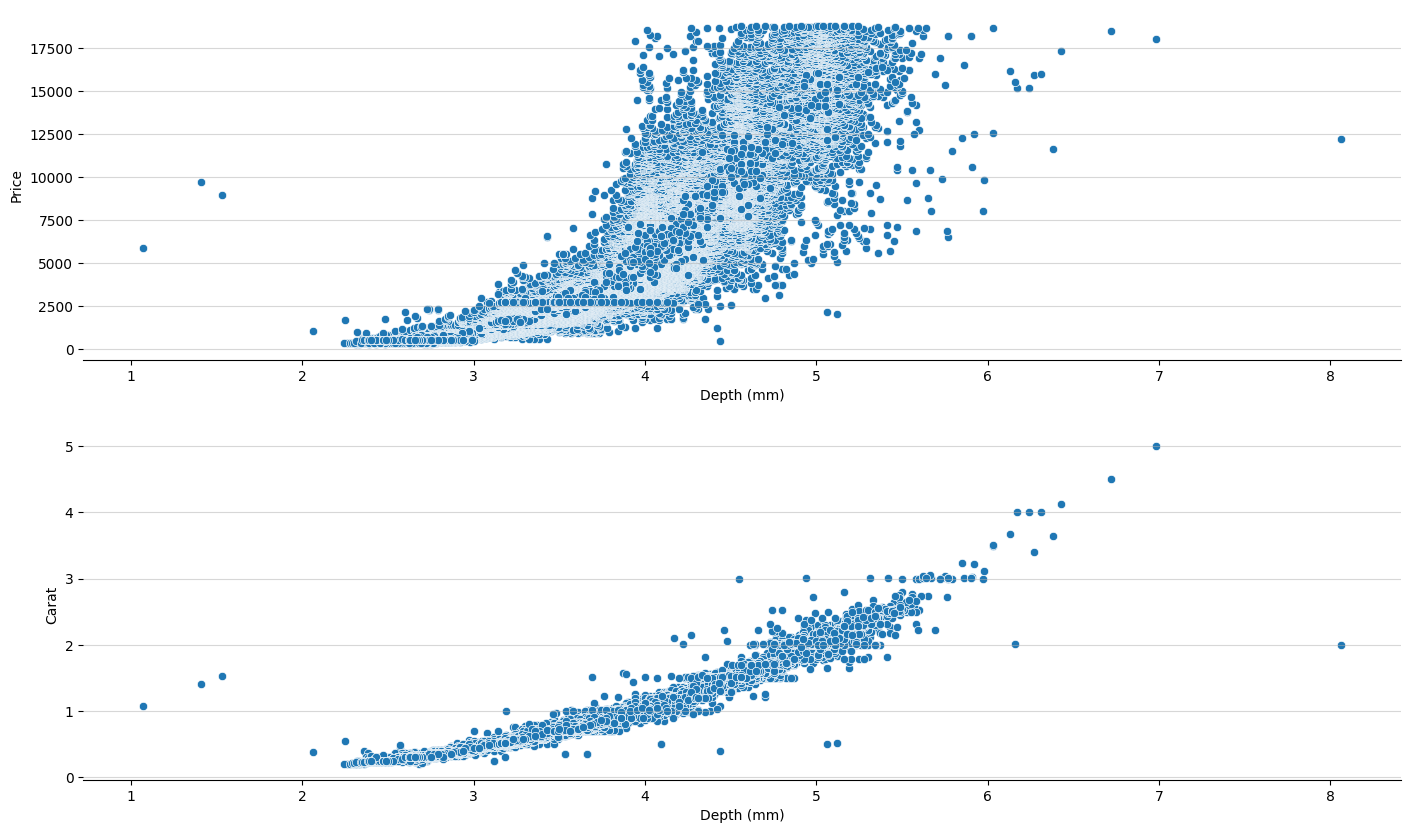

In [13]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(diamonds, x = "z", y = "price")
plt.xlabel("Depth (mm)")
plt.ylabel("Price")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.subplot(2, 1, 2)
sns.scatterplot(diamonds, x = "z", y = "carat")
plt.xlabel("Depth (mm)")
plt.ylabel("Carat")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.show()

# Comparing the relationship of diamond carat with price


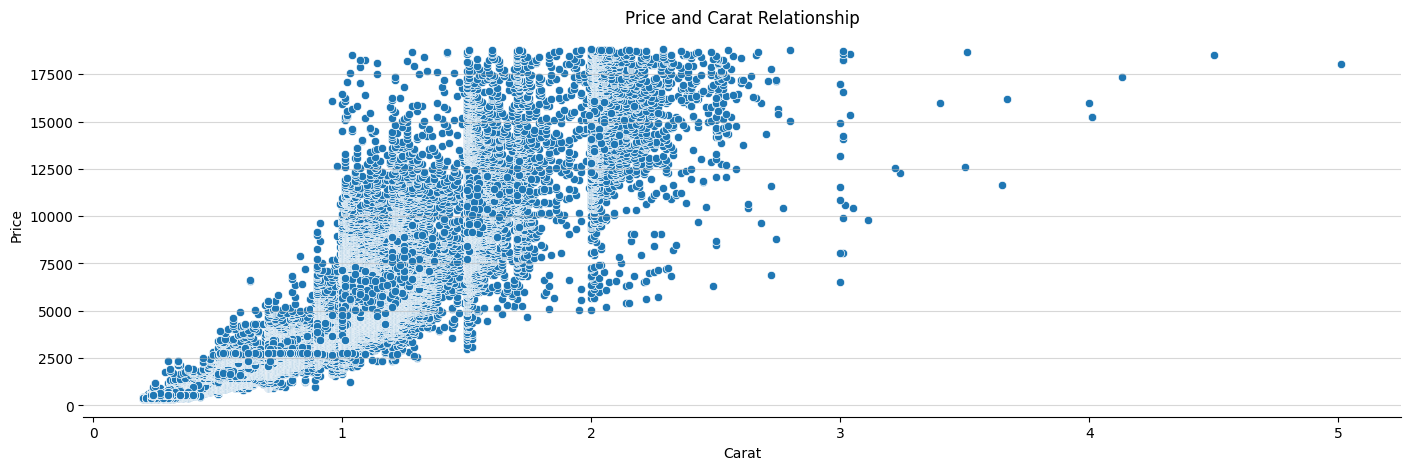

In [14]:
plt.figure(figsize=(17, 5))
sns.scatterplot(diamonds, x = "carat", y = "price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price and Carat Relationship")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis = "y", alpha = 0.5)

plt.show()

Based on the presented graphs, it is evident that the length, width and depth of a diamond have a more reliable relationship with its weight in carats than with its price. Therefore, when determining the value of a diamond with the minimum of necessary measurements, we can rely on the carat data provided. Physical dimensions, such as length, width and depth, provide a more accurate indication of diamond weight than its monetary value.

However, it is important to note that this does not mean that we cannot use length, width and depth measurements to estimate the value of a diamond. On the contrary, the more information we have, the more accurate the estimate of the diamond's price will be. However, if we have to choose the minimum amount of information to estimate the value of a diamond, we can say that the carat is sufficient for this assessment.

# Three ways to estimate the price of the diamond for the program user:

1.Request the mass of the diamond from the customer:

$$ \text{Carat} = \frac{\text{Mass (mg)}}{200}$$

2.When the user provides the diamond points:


$$Carat = \frac{\text{Points (pt)}}{100}$$


3.For the second way to estimate the carat of the diamond, 4 things are needed: Length (mm), Width (mm), Depth (mm) and density ($\frac{mm}{mm³}$). We will use the density calculation of an object to first calculate the mass of the diamond:

$$Density = \frac{Mass}{Volume} \rightarrow Mass = Density \times Volume$$

However, we don't have the volume of the diamond. For that, we will break down the volume calculation of an object, being:

$$Volume = Comprimento \times Largura \times Profundidade$$

Substituting into the formula then, it will be:

Now we will have to find the carat of the diamond. For this, we will use form 1 to estimate the diamond calculation:

$$Carat = \frac{Mass (mg)}{200}$$

Being in the general formula:

$$Carat = \frac{Density \times Volume}{200}$$ $$\text{OU}$$

$$Carat = \frac{Lenght \times Width \times Depyh \times Density}{200} $$

# Price Relationship with Categorical Columns
Descriptive statistics of the dataset


In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797211,61.751344,57.452614,3933.400501,5.730429,5.732533,3.539051
std,0.472253,1.402362,2.198344,3979.171831,1.116350,1.108490,0.690327
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.100000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2409.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5366.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,8.060000


# Price Relationship with Categorical Columns - Descriptive statistics of the dataset


In [16]:
description = diamonds.describe()
price = [f"until ${description.iloc[4, 3]}",
    f"until ${description.iloc[5, 3]}",
    f"until ${description.iloc[6, 3]}",
    f"greater than ${description.iloc[6, 3]}"]

carat = [f"until ${description.iloc[4, 0]}",
    f"until ${description.iloc[5, 0]}",
    f"until ${description.iloc[6, 0]}",
    f"greater than ${description.iloc[6, 0]}"]


# Function to group data by price or carat intervals


In [17]:
def agrupamento(diamonds, coluna, index_coluna: list):
    if coluna == "price":
        coluna_aux = 3
    else:
        coluna_aux = 0

    description = diamonds.describe()
    cut = pd.DataFrame({"Fair": [0.0 for x in range(4)],
                        "Good": [0.0 for x in range(4)],
                        "Very Good": [0.0 for x in range(4)],
                        "Premium": [0.0 for x in range(4)],
                        "Ideal": [0.0 for x in range(4)]},
                        index = index_coluna)

    color = pd.DataFrame({"J": [0.0 for x in range(4)],
                        "D": [0.0 for x in range(4)],
                        "I": [0.0 for x in range(4)],
                        "E": [0.0 for x in range(4)],
                        "F": [0.0 for x in range(4)],
                        "H": [0.0 for x in range(4)],
                        "G": [0.0 for x in range(4)]},
                        index = index_coluna)

    clarity = pd.DataFrame({"I1": [0.0 for x in range(4)],
                            "IF": [0.0 for x in range(4)],
                            "VVS1": [0.0 for x in range(4)],
                            "VVS2": [0.0 for x in range(4)],
                            "VS1": [0.0 for x in range(4)],
                            "VS2": [0.0 for x in range(4)],
                            "SI2": [0.0 for x in range(4)],
                            "SI1": [0.0 for x in range(4)]},
                            index = index_coluna)

    for intervalo in ["25%", "50%", "75%", "max"]:
        if intervalo == "25%":
            diamonds_aux = diamonds[diamonds[coluna] <= diamonds.describe()[coluna][intervalo]].reset_index()

        elif intervalo == "50%":
            diamonds_aux = diamonds[diamonds[coluna] > diamonds.describe()[coluna]["25%"]].reset_index()
            diamonds_aux = diamonds_aux[diamonds_aux[coluna] <= diamonds.describe()[coluna][intervalo]].reset_index()

        elif intervalo == "75%":
            diamonds_aux = diamonds[diamonds[coluna] > diamonds.describe()[coluna]["50%"]].reset_index()
            diamonds_aux = diamonds_aux[diamonds_aux[coluna] <= diamonds.describe()[coluna][intervalo]].reset_index()

        else:
            diamonds_aux = diamonds[diamonds[coluna] > diamonds.describe()[coluna]["75%"]].reset_index()

        describe = diamonds.describe()[coluna][intervalo]

        for x in range(diamonds_aux.shape[0]):
            for y in range(cut.shape[1]):
                if diamonds_aux.loc[x, "cut"] == cut.columns[y]:
                    try:
                        cut.loc[f"until ${describe}", cut.columns[y]] += 1.0
                    except KeyError:
                        cut.loc[f"greater than ${description.iloc[6, coluna_aux]}", cut.columns[y]] += 1.0
                    break

            for y in range(color.shape[1]):
                if diamonds_aux.loc[x, "color"] == color.columns[y]:
                    try:
                        color.loc[f"until ${describe}", color.columns[y]] += 1.0
                    except KeyError:
                        color.loc[f"greater than ${description.iloc[6, coluna_aux]}", color.columns[y]] += 1.0
                    break

            for y in range(clarity.shape[1]):
                if diamonds_aux.loc[x, "clarity"] == clarity.columns[y]:
                    try:
                        clarity.loc[f"until ${describe}", clarity.columns[y]] += 1.0
                    except (KeyError, KeyboardInterrupt):
                        clarity.loc[f"greater than ${description.iloc[6, coluna_aux]}", clarity.columns[y]] += 1.0
                    break

    soma_cut = [sum(cut.iloc[:, x]) for x in range(cut.shape[1])]
    soma_color = [sum(color.iloc[:, x]) for x in range(color.shape[1])]
    soma_clarity = [sum(clarity.iloc[:, x]) for x in range(clarity.shape[1])]

    for x in range(4):
        for y in range(cut.shape[1]):
            cut.iloc[x, y] = round(cut.iloc[x, y] / soma_cut[y], 4).astype(float)
        for y in range(color.shape[1]):
            color.iloc[x, y] = round(color.iloc[x, y] / soma_color[y], 4).astype(float)
        for y in range(clarity.shape[1]):
            clarity.iloc[x, y] = round(clarity.iloc[x, y] / soma_clarity[y], 4).astype(float)

    if "carat" == coluna:
        cut.index = [f"until {description.iloc[4, 0]}",
                    f"until {description.iloc[5, 0]}",
                    f"until {description.iloc[6, 0]}",
                    f"greater than {description.iloc[6, 0]}"]

        color.index = [f"until {description.iloc[4, 0]}",
                    f"until {description.iloc[5, 0]}",
                    f"until {description.iloc[6, 0]}",
                    f"greater than {description.iloc[6, 0]}"]

        clarity.index = [f"until {description.iloc[4, 0]}",
                    f"until {description.iloc[5, 0]}",
                    f"until {description.iloc[6, 0]}",
                    f"greater than {description.iloc[6, 0]}"]


    return cut, color, clarity


# Function to group data by price or carat intervals

In [18]:
cut, color, clarity = agrupamento(diamonds, "price", price)
cut_carat, color_carat, clarity_carat = agrupamento(diamonds, "carat", carat)

# Analyzing the generated tables:
The command above creates six tables that show, in percentages, the amount of diamonds with certain characteristics within specific value intervals. In addition, three other similar tables are generated, but instead of grouping the data by price, they are grouped by carat weight.


# Although the cut has a more significant relationship with the carat of a diamond, when we use this feature to determine the value of the jewel, we can more accurately estimate a price range for the diamond registered on the website.

In [ ]:
color

,J,D,I,E,F,H,G
until $949.0,0.1533,0.2790,0.2142,0.2852,0.2422,0.2374,0.2576
until $2409.0,0.1856,0.3030,0.1633,0.3112,0.2746,0.1711,0.2556
until $5366.0,0.2754,0.2513,0.2689,0.2498,0.2590,0.2790,0.2057
greater than $5366.0,0.3858,0.1667,0.3536,0.1538,0.2241,0.3125,0.2812


In [ ]:
cut

,Fair,Good,Very Good,Premium,Ideal
until $949.0,0.0538,0.2170,0.2575,0.2138,0.2890
until $2409.0,0.2865,0.2203,0.2117,0.2191,0.2926
until $5366.0,0.4186,0.3349,0.2788,0.2539,0.2029
greater than $5366.0,0.2410,0.2279,0.2520,0.3132,0.2155


In [ ]:
cut_carat

,Fair,Good,Very Good,Premium,Ideal
until 0.4,0.0410,0.1932,0.2450,0.2352,0.3310
until 0.7,0.2135,0.2331,0.2253,0.1894,0.2700
until 1.04,0.4603,0.3649,0.2954,0.2503,0.1846
greater than 1.04,0.2853,0.2088,0.2343,0.3251,0.2144


In [22]:
clarity_carat

,I1,IF,VVS1,VVS2,VS1,VS2,SI2,SI1
until 0.4,0.0239,0.5965,0.5485,0.4315,0.3085,0.2943,0.0902,0.1804
until 0.7,0.1180,0.2122,0.2693,0.2781,0.2712,0.2541,0.1506,0.2404
until 1.04,0.3034,0.0904,0.0993,0.1482,0.2084,0.2249,0.3510,0.3179
greater than 1.04,0.5548,0.1009,0.0829,0.1422,0.2119,0.2267,0.4082,0.2613


,I1,IF,VVS1,VVS2,VS1,VS2,SI2,SI1
until 0.4,0.0239,0.5965,0.5485,0.4315,0.3085,0.2943,0.0902,0.1804
until 0.7,0.1180,0.2122,0.2693,0.2781,0.2712,0.2541,0.1506,0.2404
until 1.04,0.3034,0.0904,0.0993,0.1482,0.2084,0.2249,0.3510,0.3179
greater than 1.04,0.5548,0.1009,0.0829,0.1422,0.2119,0.2267,0.4082,0.2613


# Draft: mention that length, width and depth make up the carat of a diamond, while cut, clarity and color can give you a clue about the price, or how it is more influential on the carat.#